In [1]:
# Import all the things

import json
import pandas as pd
import numpy as np

import acquire
from prepare import basic_clean, tokenize, lemmatize, stem, remove_stopwords, split_data, prep_string_data

import re
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

import nltk

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Acquire

In [2]:
# df = pd.read_csv('./utterances.csv')
# ep_df = pd.read_csv('./episodes.csv')


In [3]:
# df.head()

In [4]:
# ep_df.head()

In [5]:
# # joining utterances df ('df') and episodes on 'id'
# joined_df = pd.merge(df, ep_df, left_on = 'episode', right_on='id', how = 'inner')
# joined_df.drop(columns = ['id'], inplace=True)
# joined_df.rename(columns={'episode':'episode_id'}, inplace = True)

In [6]:
# joined_df['is_host'] = joined_df.speaker.str.contains(r'\W*(host)\W*')

In [7]:
# host_map = pd.read_json('host-map.json')
# host_map.head()

In [8]:
# host_id = pd.read_json('host_id.json',typ='series')
# host_id.head()

In [9]:
# inv_hosts = {v: k for k, v in host_id.items()}

In [10]:
df = acquire.get_df()

In [11]:
df.head()

,episode_id,episode_order,speaker,utterance,program,title,episode_date,is_host
0,57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ...",Talk of the Nation,How To Watch The Tour De France,2010-07-12,False
1,57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...,Talk of the Nation,How To Watch The Tour De France,2010-07-12,False
2,57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,...",Talk of the Nation,How To Watch The Tour De France,2010-07-12,True
3,57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...,Talk of the Nation,How To Watch The Tour De France,2010-07-12,False
4,57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra...",Talk of the Nation,How To Watch The Tour De France,2010-07-12,True


In [12]:
df.utterance.astype(str)

0          It's a 2,200-mile race. To give some sense of ...
1          So for a top competitor like Lance to try to m...
2          So in every team, presumably there's one star,...
3          That's right. Each team has nine riders. And w...
4          So slipstream, this is like drafting in car ra...
                                 ...                        
3199853                         Oh, I don't know about that.
3199854                                           (LAUGHTER)
3199855    Ray Magliozzi, co-host of the longtime NPR pro...
3199856      Nice to talk to you, too, Robert - my pleasure.
3199857    (SOUNDBITE OF CHICORY TIP SONG, "SON OF MY FAT...
Name: utterance, Length: 3199858, dtype: object

## Preparation

- nulls
- duplicates
- create sentiment score
- use prep functions
- keep some punctuation
- split
- date to datetime

In [31]:
# drop nulls
df.dropna(inplace=True)

In [32]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [33]:
# remove rows without speaker (sounde effects)
df = df[df.speaker!='_NO_SPEAKER']

In [34]:
# remove rows with foreign languages spoken
df = df[df.utterance!='(Foreign language spoken)']


In [39]:
df['utterance'] = df.utterance.astype(str)

In [40]:
df = prep_string_data(df, df.utterance)

KeyError: "None of [Index(['It's a 2,200-mile race. To give some sense of perspective, that's roughly the distance between Washington, D.C. and Las Vegas. They do it over the course of three weeks at very fast speeds. But incredibly, oftentimes the distance between first and second is somewhere between and one and three minutes.',\n       'So for a top competitor like Lance to try to make up that much time -he's now 13 minutes, 26 seconds behind the current race leader, Cadel Evans of Australia. And even Lance said yesterday that for him, the -any chance of winning the tour has gone out the window. He still does have a teammate on his team, RadioShack team, American Levi Leipheimer currently in eighth place, two minutes, 14 seconds back. And Lance is going to do what he can to help Leipheimer do well.',\n       'So in every team, presumably there's one star, one equivalent to Lance Armstrong and the other team - the rest of the teammates project him, do what they can to help him succeed?',\n       'That's right. Each team has nine riders. And what you have is basically the team leader, sort of your queen bee, and then eight worker bees working to keep that queen safe and happy for when the decisive moments of the race come. In cycling, a lot of the energy goes toward actually battling wind resistance. So if you're riding behind another rider, you can be using up to 30 percent less energy because you're in that slipstream of the rider who's battling the wind. So team riders will ride on the front, protect their leader. You'll often see a team member drift back to the team car to fetch water bottles to keep their leader well hydrated.',\n       'So slipstream, this is like drafting in car racing, right?',\n       'That's exactly right.',\n       'And so the guy who's in back has an easier time. And even when there are people in front on a breakaway, for example, who are from different teams, three or four riders, you will see them switch back and forth rather congenially so the same person isn't in front all the time.',\n       'That's right. There's a lot of deal making that can go on in those breakaways. And oftentimes, they'll share the work until a time when they've determined it's every man for himself. But up until then, they form a sort of de facto team. And then sometimes you can see they've actually decided who might be able to win the stage that day. And these wagers can be for anything, for future favors, for money, for other things that they determine are valuable.',\n       'We're talking with Loren Mooney, the editor-in-chief of Bicycling Magazine. She's at our bureau in New York. Why do you watch the Tour de France? So we want to hear from our bicycling audience today. 800-989-8255. Email us: talk@npr.org. And we'll start with John(ph), John with us from San Francisco.',\n       'Hello.',\n       ...\n       'Let's work backwards. On February 8 in the Bronx, a shot was fired inside a high school. No one was injured.',\n       'On February 5, two shootings - one, a student was shot in the parking lot at Oxon Hill High School in Maryland.',\n       'UNIDENTIFIED MAN #1: That victim, said to be a male in 11th grade, then ran into the school for help before collapsing.',\n       'He survived.',\n       'That same day at a special education center in Minnesota, a third grader pulled the trigger on a police officer's gun. No one was injured.',\n       'On February 1 in Los Angeles...',\n       'UNIDENTIFIED MAN #2: Terrifying moments inside a California middle school - students under lockdown, a 12-year-old girl with a gun.',\n       'That girl brought a gun to school, and it accidentally went off when she dropped her backpack. Two students were shot.',\n       'On January 31 - gunshots outside a high school in Philadelphia. A 32-year-old man died.',\n       'January 26, shots were fired in a high school parking lot in Dearborn, Mich. No one was injured.'],\n      dtype='object', length=2998283)] are in the [columns]"

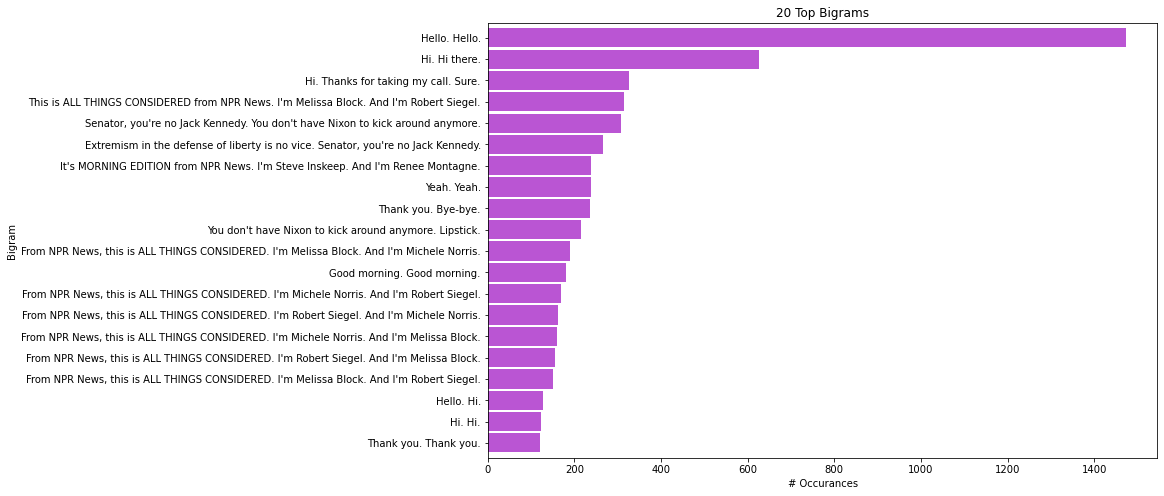

In [35]:
# Calculate bigrams
bigrams = (pd.Series(nltk.ngrams(df.utterance, 2))
                      .value_counts()
                      .head(20))
# Vizualize Bigrams
bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Top Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

## Initial Planning Analysis

In [19]:
# read in primary utterances csv for dataframe
df = pd.read_csv('./utterances.csv')
df.head()

,episode,episode_order,speaker,utterance
0,57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ..."
1,57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...
2,57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,..."
3,57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...
4,57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra..."


In [20]:
# find utterance count per episode
df.episode.value_counts()

19633    569
35108    552
57481    539
73336    492
66523    480
        ... 
80400      1
61102      1
88047      1
73497      1
92554      1
Name: episode, Length: 104920, dtype: int64

In [21]:
# find utterance count per episode
test = df.episode.value_counts() < 2
test.sum()

1357

In [22]:
# pull in episodes df
ep_df = pd.read_csv('./episodes.csv')
ep_df.head()

,id,program,title,episode_date
0,98814,Morning Edition,Senate Ushers In New Year With 'Fiscal Cliff' ...,2013-01-01
1,98824,Morning Edition,Cheap Bubbly Or Expensive Sparkling Wine? Look...,2012-12-31
2,98821,Morning Edition,U.S. Gas Prices Reach Record Level In 2012,2013-01-01
3,98806,Morning Edition,House Approves 'Fiscal Cliff' Measure,2013-01-02
4,98823,Morning Edition,The Fiscal Cliff: A Love Story,2012-12-31


In [23]:
# check episode content to see if it matches episode id
df[df.episode == 92554].utterance.to_list()

["Good morning. I'm David Greene. Here's the weather forecast for Albuquerque, New Mexico today - cloudy with a chance of grasshoppers. Yes, that's right. The animals are swarming the city so densely, local radar is mistaking them for rain crowds. These insects are hovering in masses as high as a thousand feet up. Officials say this is the worst infestation in 20 years, but it should pass soon. With any luck, it will go back to raining rain - helping to clean up the mess left behind by these grasshoppers. You're listening to MORNING EDITION."]

In [24]:
# check ep_df.id = df.episode
ep_df[ep_df.id == 92554].title.to_list()

["Albuquerque's Weather? Cloudy With A Chance of Grasshoppers"]

### Initial takeaways
There are episodes with one utterance, showing less interview setting and more reporting.

ep_df.id == df.episode